<a href="https://colab.research.google.com/github/edufsi/Projeto-Desafio/blob/Eduardo/Etapa7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importar dados:
url_commodities = "https://raw.githubusercontent.com/edufsi/Projeto-Desafio/main/Dados/UNdata_Export_20240412_201846138.csv"
url_parceiros = "https://raw.githubusercontent.com/edufsi/Projeto-Desafio/main/Dados/SYB66_330_202310_Major%20Trading%20Partners.csv"
url_exportacoes = "https://raw.githubusercontent.com/edufsi/Projeto-Desafio/main/Dados/SYB66_123_202310_Total%20Imports%20Exports%20and%20Balance%20of%20Trade.csv"
url_cambio = "https://raw.githubusercontent.com/edufsi/Projeto-Desafio/main/Dados/USD_BRL_Historical_Data.csv"


dados_commodities = pd.read_csv(url_commodities)
dados_parceiros = pd.read_csv(url_parceiros, encoding = "ISO-8859-1")
dados_exportacoes = pd.read_csv(url_exportacoes, encoding = "ISO-8859-1")
dados_cambio = pd.read_csv(url_cambio, sep=';')

In [3]:
# VISÃO GERAL
dados_cambio.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,04/12/2024,5.1175,5.0922,5.1487,5.0890,NaN,0.51%
1,04/11/2024,5.0917,5.0735,5.0931,5.0580,NaN,0.34%
2,04/10/2024,5.0746,5.0092,5.0863,4.9970,NaN,1.31%
3,04/09/2024,5.0090,5.0281,5.0310,4.9995,NaN,-0.35%
4,04/08/2024,5.0268,5.0665,5.0759,5.0247,NaN,-0.76%


In [4]:
dados_cambio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7626 entries, 0 to 7625
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      7626 non-null   object 
 1   Price     7626 non-null   float64
 2   Open      7626 non-null   float64
 3   High      7626 non-null   float64
 4   Low       7626 non-null   float64
 5   Vol.      1032 non-null   object 
 6   Change %  7626 non-null   object 
dtypes: float64(4), object(3)
memory usage: 417.2+ KB


In [5]:
dados_cambio.describe()

,Price,Open,High,Low
count,7626.000000,7626.000000,7626.000000,7626.000000
mean,2.701344,2.700670,2.720376,2.682573
std,1.296039,1.295988,1.307962,1.284266
min,0.833000,0.832500,0.834500,0.832500
25%,1.785075,1.785125,1.795525,1.774000
50%,2.304800,2.305000,2.326400,2.280650
75%,3.421425,3.421575,3.466625,3.390425
max,5.885600,5.924800,5.971800,5.817600


In [6]:
# Temos 3 problemas principais nesse dataframe.

In [7]:
# O primeiro problema é que a coluna change % está como objeto, mas deveria ser de números

dados_cambio['Change %'] = dados_cambio['Change %'].apply(lambda x: x.replace('%', '')).astype(np.float64) / 100

In [8]:
# O segundo problema é a coluna de data. A data está formatada como mm/dd/aa. Como a formatação pelo menos segue um padrão, podemos arrumar isso fazendo uma
# função simples e aplicando ela a cada linha, sem necessitar o uso de expressões regulares ou nada mais complexo

# formata_data(mm_dd_aa: string) -> aa_mm_dd: string
  # dada uma data na representação mm/dd/aa retorna a mesma data como aa/mm/dd
def formata_data(string):
  mes = string[0] + string[1]
  dia = string[3] + string[4]
  ano = string[6:]

  return ano + '/' + mes + '/' + dia

dados_cambio['Date'] = dados_cambio['Date'].apply(formata_data)

In [9]:
# Por último, a coluna de volumes tem informações apenas durante um intervalo que vai de 2018 a 2023. E mesmo
# dentro desse intervalo possui alguns buracos. Podemos usar isso pra algo, mas vamos deixar separado para tirar do dataframe principal

mascara = dados_cambio.fillna(0)['Vol.'] != 0

# Vamos tomar todo o intervalo, mesmo que tenha alguns pequenos buracos entre eles. Se formos usar essa informação, veremos o que fazer com os buracos

# O index inicial é o nome da primeira linha do DataFrame em que o valor de volume nao e nulo
index_inicial = dados_cambio[mascara].iloc[0].name

# O index final é o nome da última linha do DataFrame em que o valor de volume não é nulo
index_final = dados_cambio[mascara].iloc[-1].name


dados_cambio_volume = dados_cambio.iloc[index_inicial:index_final]


# Pronto, separados esses dados podemos tirar essa coluna do dataframe principal
dados_cambio.drop('Vol.', axis=1, inplace=True)

In [10]:
dados_cambio_volume

,Date,Price,Open,High,Low,Vol.,Change %
314,2023/01/24,5.1392,5.2080,5.2207,5.1344,102.09K,-0.0131
315,2023/01/23,5.2076,5.2079,5.2207,5.1634,130.45K,0.0000
316,2023/01/20,5.2074,5.1746,5.2400,5.1639,115.59K,0.0064
317,2023/01/19,5.1741,5.1868,5.2562,5.1631,156.95K,-0.0024
318,2023/01/18,5.1863,5.1007,5.1901,5.0655,162.32K,0.0169
...,...,...,...,...,...,...,...
1367,2019/01/09,3.6807,3.7138,3.7155,3.6743,48.59K,-0.0088
1368,2019/01/08,3.7133,3.7373,3.7412,3.7034,49.06K,-0.0060
1369,2019/01/07,3.7356,3.7139,3.7384,3.6898,44.59K,0.0054
1370,2019/01/04,3.7155,3.7593,3.7850,3.7088,56.28K,-0.0109


In [11]:
dados_cambio

,Date,Price,Open,High,Low,Change %
0,2024/04/12,5.1175,5.0922,5.1487,5.0890,0.0051
1,2024/04/11,5.0917,5.0735,5.0931,5.0580,0.0034
2,2024/04/10,5.0746,5.0092,5.0863,4.9970,0.0131
3,2024/04/09,5.0090,5.0281,5.0310,4.9995,-0.0035
4,2024/04/08,5.0268,5.0665,5.0759,5.0247,-0.0076
...,...,...,...,...,...,...
7621,1995/01/06,0.8420,0.8400,0.8450,0.8380,0.0030
7622,1995/01/05,0.8395,0.8445,0.8445,0.8395,-0.0059
7623,1995/01/04,0.8445,0.8425,0.8455,0.8425,0.0006
7624,1995/01/03,0.8440,0.8420,0.8470,0.8420,0.0024


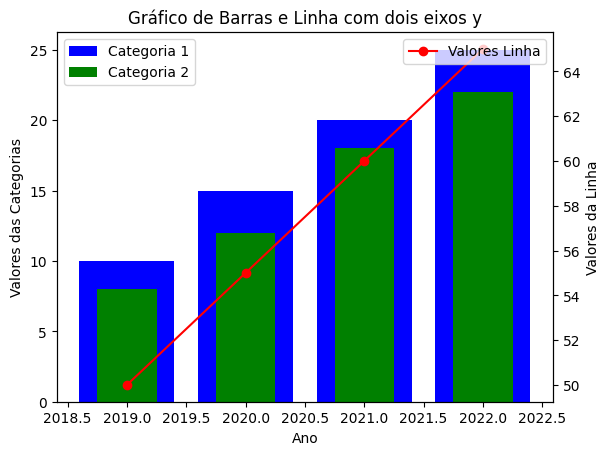

In [27]:


# Dados de exemplo
anos = [2019, 2020, 2021, 2022]
valores_categoria1 = [10, 15, 20, 25]
valores_categoria2 = [8, 12, 18, 22]
valores_linha = [50, 55, 60, 65]

# Criar figura e eixos
fig, ax1 = plt.subplots()

# Plotar as barras da categoria 1
ax1.bar(anos, valores_categoria1, color='blue', label='Categoria 1')

# Plotar as barras da categoria 2
ax1.bar(anos, valores_categoria2, color='green', label='Categoria 2', width=0.5)

# Configurar eixo y da esquerda (para as barras)
ax1.set_ylabel('Valores das Categorias')
ax1.set_xlabel('Ano')

# Adicionar legenda
ax1.legend(loc='upper left')

# Adicionar segundo eixo y (para a linha)
ax2 = ax1.twinx()
ax2.plot(anos, valores_linha, color='red', marker='o', label='Valores Linha')

# Configurar eixo y da direita (para a linha)
ax2.set_ylabel('Valores da Linha')

# Adicionar legenda para a linha
ax2.legend(loc='upper right')

# Título do gráfico
plt.title('Gráfico de Barras e Linha com dois eixos y')

# Mostrar o gráfico
plt.show()

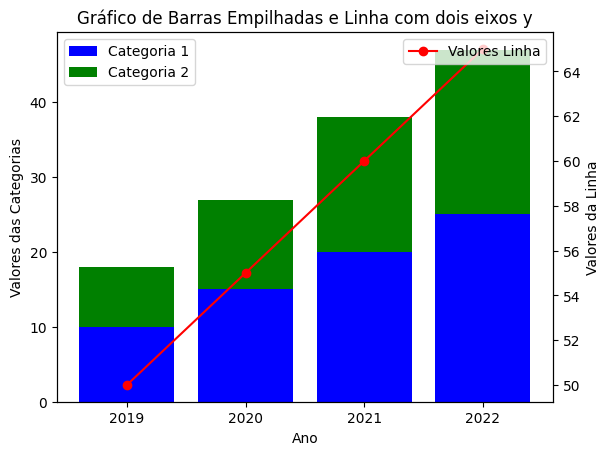

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
anos = [2019, 2020, 2021, 2022]
valores_categoria1 = [10, 15, 20, 25]
valores_categoria2 = [8, 12, 18, 22]
valores_linha = [50, 55, 60, 65]

# Criar figura e eixos
fig, ax1 = plt.subplots()

# Plotar as barras empilhadas
ax1.bar(anos, valores_categoria1, color='blue', label='Categoria 1')
ax1.bar(anos, valores_categoria2, bottom=valores_categoria1, color='green', label='Categoria 2')

# Configurar eixo y da esquerda (para as barras)
ax1.set_ylabel('Valores das Categorias')
ax1.set_xlabel('Ano')

# Definir os anos como rótulos do eixo x
plt.xticks(anos)

# Adicionar legenda
ax1.legend(loc='upper left')

# Adicionar segundo eixo y (para a linha)
ax2 = ax1.twinx()
ax2.plot(anos, valores_linha, color='red', marker='o', label='Valores Linha')

# Configurar eixo y da direita (para a linha)
ax2.set_ylabel('Valores da Linha')

# Adicionar legenda para a linha
ax2.legend(loc='upper right')

# Título do gráfico
plt.title('Gráfico de Barras Empilhadas e Linha com dois eixos y')

# Mostrar o gráfico
plt.show()

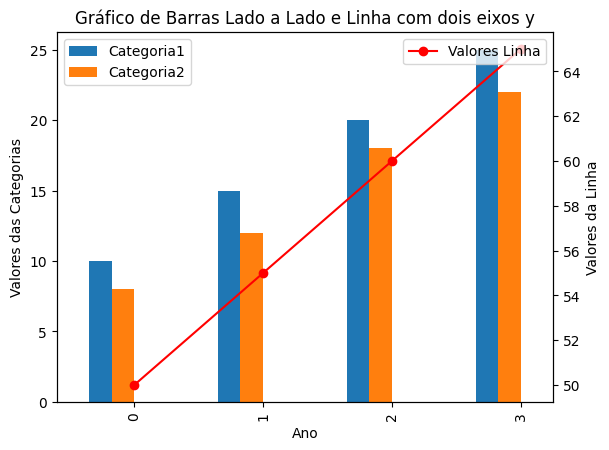

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Dados de exemplo
dados = {
    'Ano': [2019, 2020, 2021, 2022],
    'Categoria1': [10, 15, 20, 25],
    'Categoria2': [8, 12, 18, 22],
    'ValoresLinha': [50, 55, 60, 65]
}

# Converter os dados em um DataFrame
df = pd.DataFrame(dados)

# Criar figura e eixos
fig, ax1 = plt.subplots()

# Plotar as barras lado a lado
df[['Categoria1', 'Categoria2']].plot(kind='bar', ax=ax1, width=0.35, position=1)

# Configurar eixo y da esquerda (para as barras)
ax1.set_ylabel('Valores das Categorias')
ax1.set_xlabel('Ano')

# Adicionar segundo eixo y (para a linha)
ax2 = ax1.twinx()
df['ValoresLinha'].plot(ax=ax2, color='red', marker='o', label='Valores Linha')

# Configurar eixo y da direita (para a linha)
ax2.set_ylabel('Valores da Linha')

# Adicionar legenda para a linha
ax2.legend(loc='upper right')

# Título do gráfico
plt.title('Gráfico de Barras Lado a Lado e Linha com dois eixos y')

# Mostrar o gráfico
plt.show()